# Prosjekt Innlevering
### Eric Joshua Stangeland

## Oppgaver

a) Løs Laplaces likning for $d = 0.5$ (dvs. kondesatorene plassert i $x = \pm0.25$), og plott
potensialet inne i boksen enten som heatmap eller 3d-overflate

$\begin{equation}
\nabla^2 V=0
\end{equation}$

$$\frac{\partial^2}{\partial^2 x}V(x,y) + \frac{\partial^2}{\partial^2y}V(x,y)=0 $$

Randbetingelser:

$V(-0.25,y) = 1$ for $-0.5\leq y \leq 0.5$

$V(0.25,y) = -1$ for $-0.5\leq y \leq 0.5$

er brukt som initialisering av `V_new`. Deretter, iterer vi fra `V_new` ved a ta ett `Gauss Seidel`-steg og sammenligner resultatet fra forrige om det er betydelige forandringer. Slik blir konvergens kondisjon `np.linalg.norm(V_new - V_old) < tol`, ellers fortsetter vi a ta iterasjoner. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# analytic for oppgave a), b) (justeres i c) i henhold av plateavstand)
N = 100
x = y = np.linspace(-1, 1, N)
xv, yv = np.meshgrid(x, -y) 



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
def set_Potential(V, d, N):
    V[int(N*0.25):int(N*0.75),int(N*(0.5)*(1-d/2))] = 1.0
    V[int(N*0.25):int(N*0.75),int(N*(0.5+0.5*d/2))] = -1.0
    V[0,:] = 0
    V[-1,:] = 0
    V[:,-1]=0
    V[:,0]=0
    return V

def GS_steg(V_k, N):
    V_new = np.copy(V_k)
    # bruke formelen for ett steg av Gauss-Seidel iterasjon
    for i in np.arange(1,N-1):
        V_new[0,i] = (V_new[0,i-1] + V_new[0,i+1] + V_new[N-1,i] + V_new[1,i]) / 4.0
        for j in np.arange(1,N-1):
            V_new[j,i] = (V_new[j,i-1] + V_new[j,i+1] + V_new[j-1,i] + V_new[j+1,i]) / 4.0
        V_new[N-1,i] = (V_new[N-1,i-1] + V_new[N-1,i+1] + V_new[N-2,i] + V_new[0,i]) / 4.0
    return V_new
    

def GS(V_0, N, tol, d):
    start_time = time.time()
    
    V_old = np.zeros((N,N))
    V_new = V_0
    steps = 0
    # fortsett inntil np.linalg.norm(V_new - V_old) < tol:
    while np.linalg.norm(V_new - V_old) > tol:
        #print(np.linalg.norm(V_new - V_old))
        V_old = np.copy(V_new)
        # ta en Gauss-Seidel iterasjon
        V_new = GS_steg(V_new, N)
        V_new = set_Potential(V_new, d, N) # beholde potensialet 1 -> -1 pa platene
        steps += 1
    
    end_time = time.time()
    
    return V_new, steps, end_time-start_time

In [4]:
#Parameterne
N=100
tol = 1e-2
d = 0.5
#Intialiser spenningene
V_0 = np.zeros((N,N))
# N*(0.5)*(1-d/2) venstre, hoyre N*(0.5+(d/2)*0.5)
V_0 = set_Potential(V_0, d, N) 
V_GS, steps_GS, time_GS = GS(V_0, N, tol, d)
V_GS[V_GS > 1] = 1
V_GS[V_GS < -1] = -1
print ('Reaching a tolerance of %.1f took %.3f seconds and required %d steps.' %(tol, time_GS, steps_GS))

        

Reaching a tolerance of 0.0 took 4.260 seconds and required 590 steps.


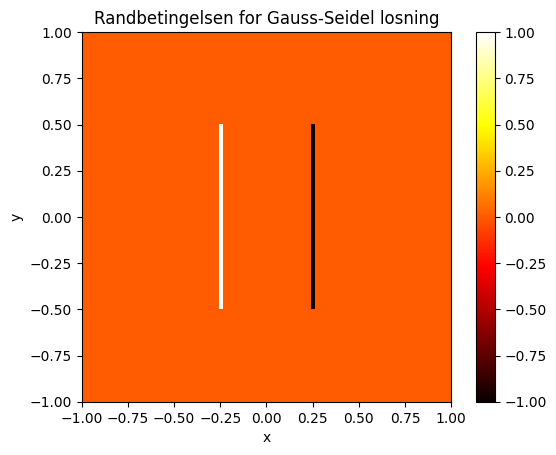

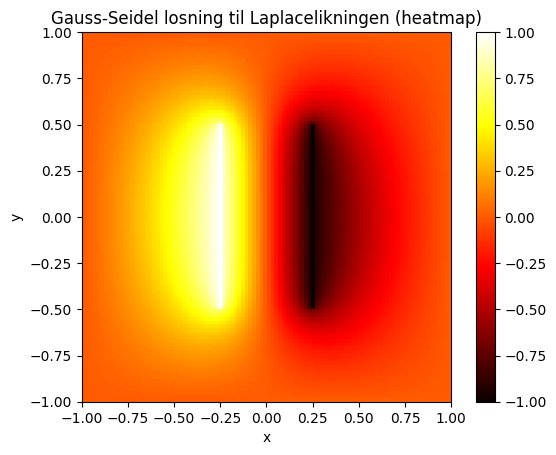

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


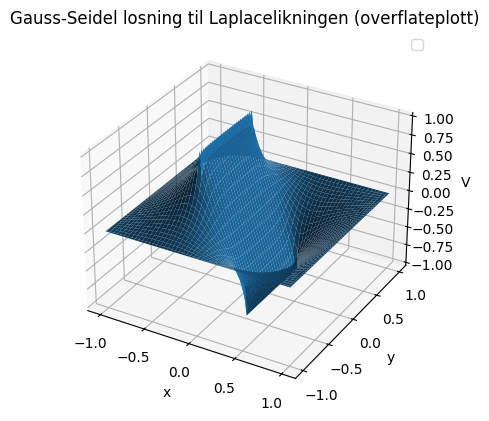

In [6]:
plt.imshow(V_0,                       # Scalar field to plot
           cmap='hot',              # Colour choice, there are some fancy options out there
           #vmin=-1, vmax=1,         # Set min and max values to be included in the heatmap
           extent=(-1, 1, -1, 1))   # Extent of the axis values
cb = plt.colorbar()
plt.title('Randbetingelsen for Gauss-Seidel losning')
plt.xlabel("x")
plt.ylabel("y")
plt.show()
#Plot
plt.imshow(V_GS,                       # Scalar field to plot
           cmap='hot',              # Colour choice, there are some fancy options out there
           #vmin=-1, vmax=1,         # Set min and max values to be included in the heatmap
           extent=(-1, 1, -1, 1))   # Extent of the axis values
cb = plt.colorbar()
plt.title('Gauss-Seidel losning til Laplacelikningen (heatmap)')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('Potential.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xv, yv, V_GS)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("V")
plt.title('Gauss-Seidel losning til Laplacelikningen (overflateplott)')
plt.legend()
plt.show()

b) Fra potensialet, finn det elektriske feltet i boksen og plott dette som en quiverplot. $Hint:$
Bruk `np.gradient` for a finne gradienten til $V$

$\begin{equation}
E=-\nabla V
\end{equation}$


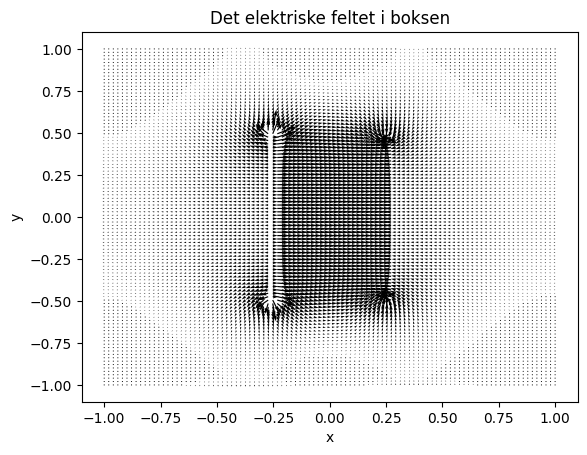

In [7]:
Ey, Ex = np.gradient(V_GS)

xp = np.linspace(-1, 1, N)
yp = np.linspace(-1, 1, N)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Det elektriske feltet i boksen")
plt.quiver(xp, yp, -1*Ex, -1*Ey)
plt.savefig('quiverplotE.png')

c) Plott den elektriske feltstyrken i punktet $(0, 0.6)$ som funksjon av plateseparasjon $d$

[0.3, 0.4, 0.5, 0.7, 1, 1.2, 1.5]
0.3


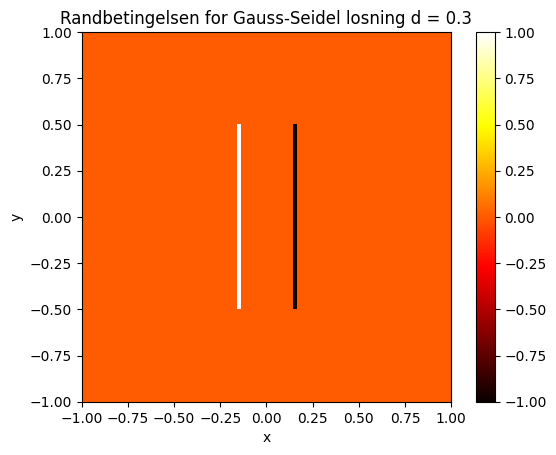

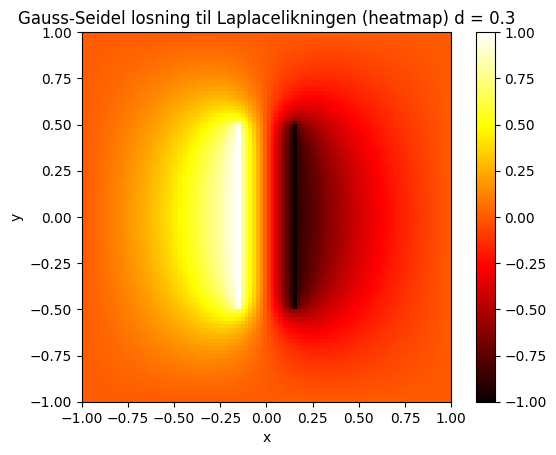

Reaching a tolerance of 0.0 took 4.590 seconds and required 649 steps for 0.300 plate distance.
0.4


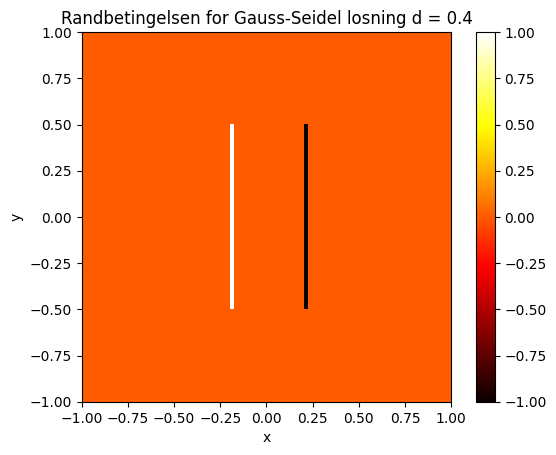

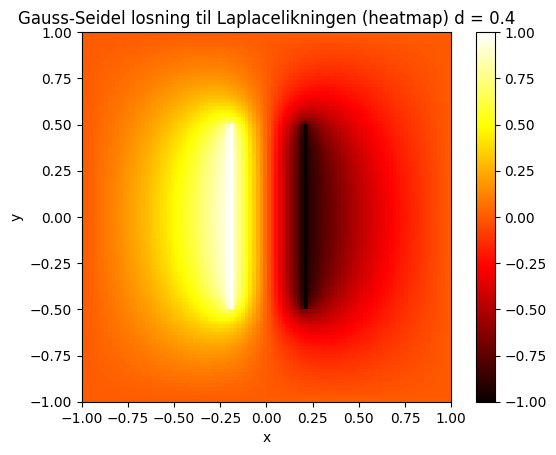

Reaching a tolerance of 0.0 took 4.441 seconds and required 623 steps for 0.400 plate distance.
0.5


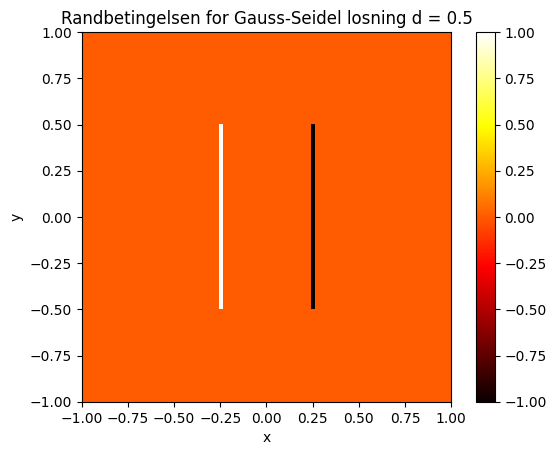

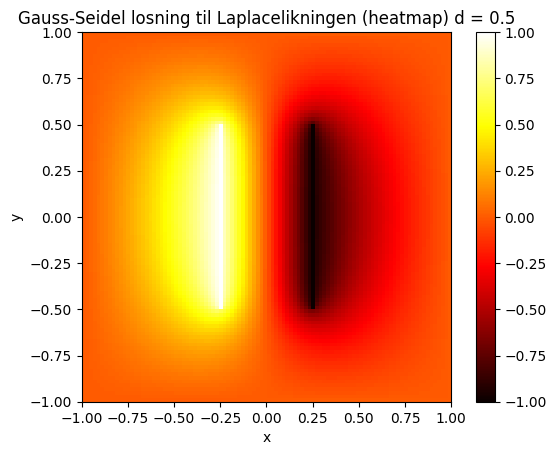

Reaching a tolerance of 0.0 took 4.182 seconds and required 590 steps for 0.500 plate distance.
0.7


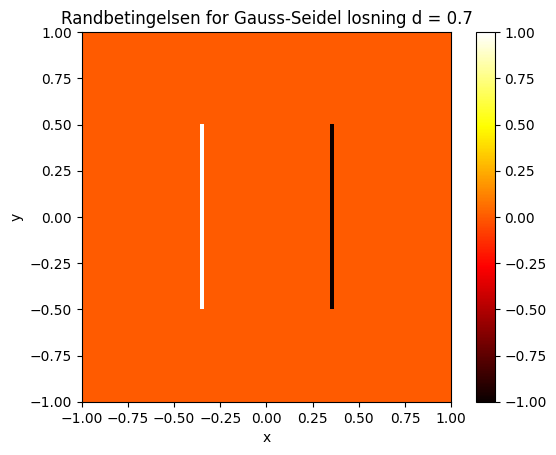

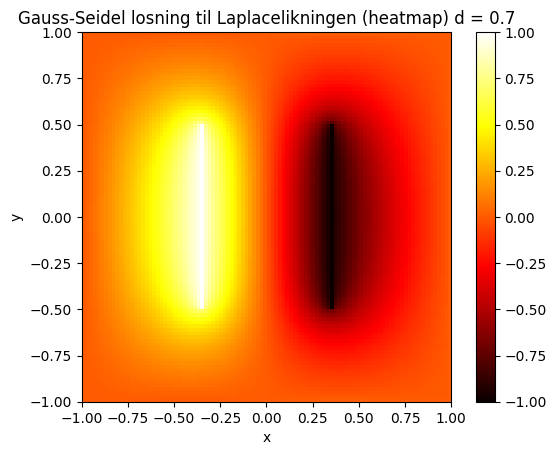

Reaching a tolerance of 0.0 took 3.720 seconds and required 519 steps for 0.700 plate distance.
1


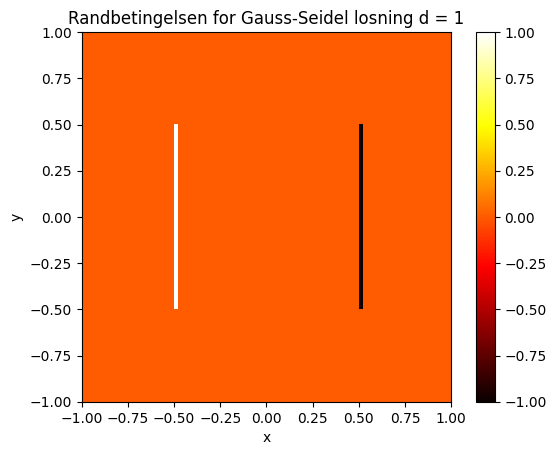

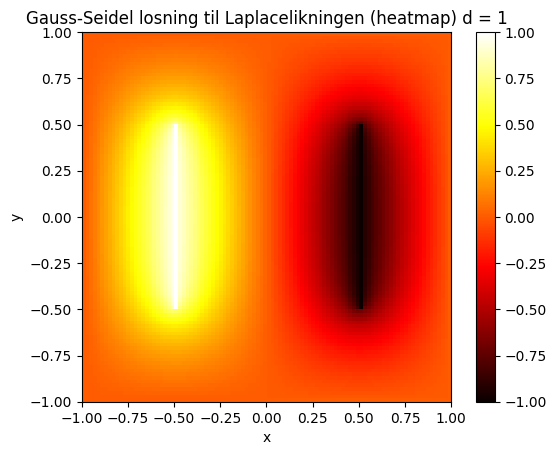

Reaching a tolerance of 0.0 took 3.185 seconds and required 451 steps for 1.000 plate distance.
1.2


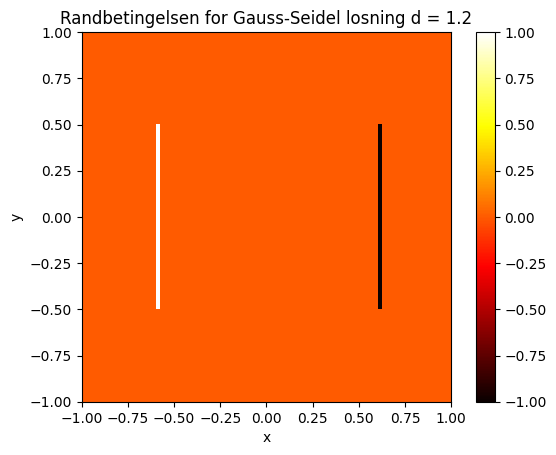

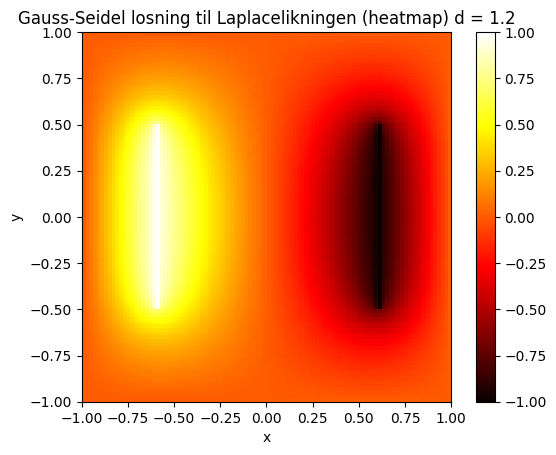

Reaching a tolerance of 0.0 took 3.472 seconds and required 492 steps for 1.200 plate distance.
1.5


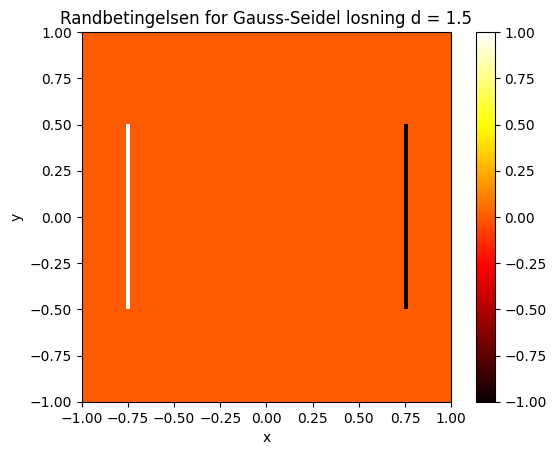

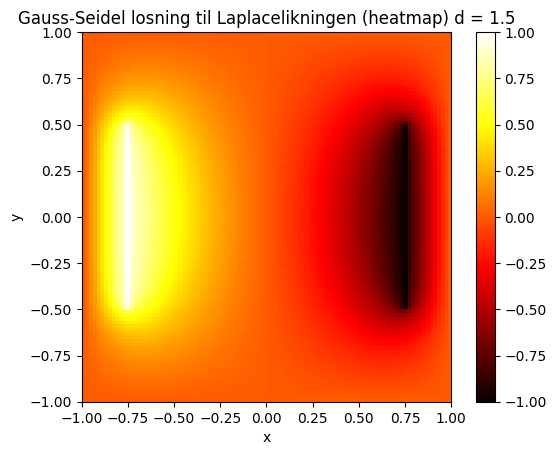

Reaching a tolerance of 0.0 took 4.172 seconds and required 598 steps for 1.500 plate distance.


In [7]:
#Set parameters
N=100
tol = 1e-2
ds = [0.3, 0.4, 0.5, 0.7, 1, 1.2, 1.5]
print(ds)
#Intialise the trial solution
V_analytic = np.zeros((N,N))
E_felter = []
for d in ds:
    print(d)
    V_0 = np.zeros((N,N))
    
    # N*(0.5)*(1-d/2) venstre, hoyre N*(0.5+(d/2)*0.5)
    V_0 = set_Potential(V_0, d, N)

    plt.imshow(V_0,                       # Scalar field to plot
           cmap='hot',              # Colour choice, there are some fancy options out there
           #vmin=-1, vmax=1,         # Set min and max values to be included in the heatmap
           extent=(-1, 1, -1, 1))   # Extent of the axis values
    cb = plt.colorbar()
    plt.title(f'Randbetingelsen for Gauss-Seidel losning d = {d}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    #Run the Jacobi function to calculate V_conv
    V_GS, steps_GS, time_GS = GS(V_0, N, tol, d)
    V_GS[V_GS > 1] = 1
    V_GS[V_GS < -1] = -1        

    plt.imshow(V_GS,                       # Scalar field to plot
           cmap='hot',              # Colour choice, there are some fancy options out there
           #vmin=-1, vmax=1,         # Set min and max values to be included in the heatmap
           extent=(-1, 1, -1, 1))   # Extent of the axis values
    cb = plt.colorbar()
    plt.title(f'Gauss-Seidel losning til Laplacelikningen (heatmap) d = {d}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    Ey, Ex = np.gradient(V_GS)
    # the point (0, 0.6) in [int(N*(0.5 + 0.6*0.5)][int(N*0.5)] - [y][x]
    E_felter.append(np.sqrt(Ey[int(N*(0.5 + 0.6*0.5))][int(N*0.5)]**2 + Ex[int(N*(0.5 + 0.6*0.5))][int(N*0.5)]**2))
    #Print time
    print ('Reaching a tolerance of %.1f took %.3f seconds and required %d steps for %.3f plate distance.' %(tol, time_GS, steps_GS, d))



[0.3, 0.4, 0.5, 0.7, 1, 1.2, 1.5]


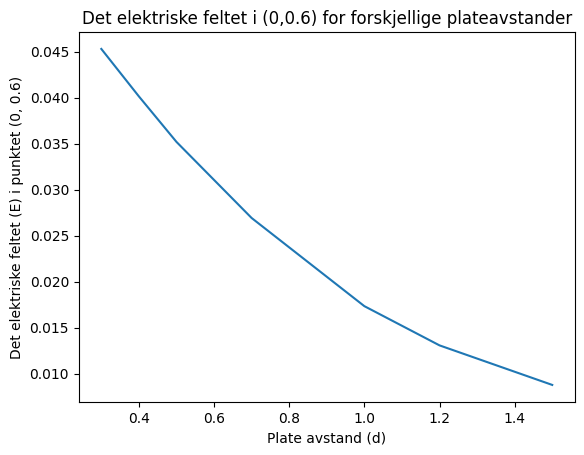

In [8]:
plt.plot(ds, E_felter)
print(ds)
plt.title("Det elektriske feltet i (0,0.6) for forskjellige plateavstander")
plt.xlabel("Plate avstand (d)")
plt.ylabel("Det elektriske feltet (E) i punktet (0, 0.6)")
plt.show()